<a href="https://colab.research.google.com/github/Daniel-Sottovia/PayFace_Daniel/blob/main/VGG_sequencial_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  VGG16 Sequential

from article: **Face presentation attack identification optimization with adjusting convolution blocks in VGG networks**

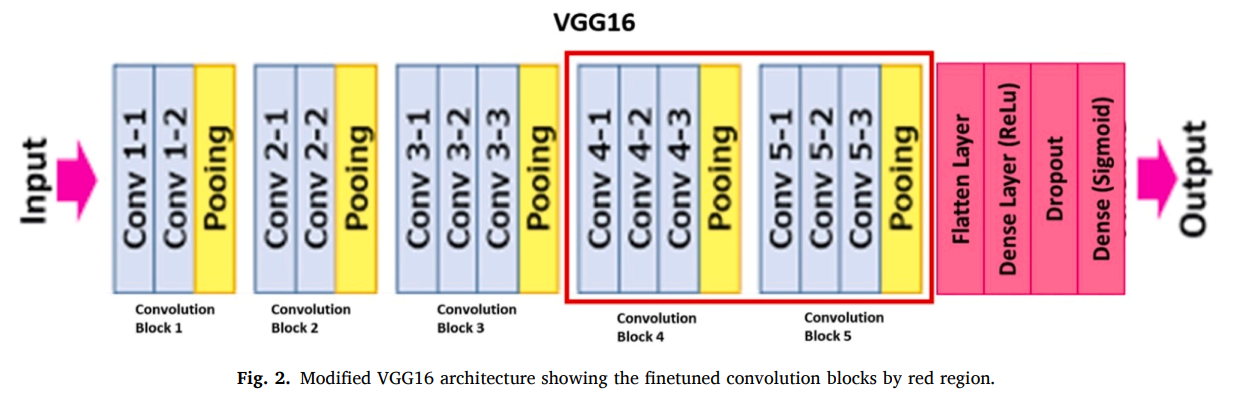

In [7]:
import tensorflow as tf

In [50]:
from tensorflow.python import training
class VGG16:
  def __init__(self, input_shape = (224, 224, 3)):
    self.model =  self.altera_modelo(input_shape = input_shape)

  def create_model(self, input_shape):
    model = tf.keras.Sequential([
        
        # Block 1
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same", name="block1_conv1", input_shape=(224,224,3)),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same", name="block1_conv2"),
        tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name="block1_pool"),

        # Block 2
        tf.keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same", name="block2_conv1"),
        tf.keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same", name="block2_conv2"),
        tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name="block2_pool"),

        # Block 3
        tf.keras.layers.Conv2D(256, (3, 3), activation="relu", padding="same", name="block3_conv1"),
        tf.keras.layers.Conv2D(256, (3, 3), activation="relu", padding="same", name="block3_conv2"),
        tf.keras.layers.Conv2D(256, (3, 3), activation="relu", padding="same", name="block3_conv3"),
        tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name="block3_pool"),

        # Block 4
        tf.keras.layers.Conv2D(512, (3, 3), activation="relu", padding="same", name="block4_conv1"),
        tf.keras.layers.Conv2D(512, (3, 3), activation="relu", padding="same", name="block4_conv2"),
        tf.keras.layers.Conv2D(512, (3, 3), activation="relu", padding="same", name="block4_conv3"),
        tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name="block4_pool"),

        # Block 5
        tf.keras.layers.Conv2D(512, (3, 3), activation="relu", padding="same", name="block5_conv1"),
        tf.keras.layers.Conv2D(512, (3, 3), activation="relu", padding="same", name="block5_conv2"),
        tf.keras.layers.Conv2D(512, (3, 3), activation="relu", padding="same", name="block5_conv3"),
        tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name="block5_pool"),

        # Classification block
        tf.keras.layers.Flatten(name='flatten'),
        tf.keras.layers.Dense(4096, activation='relu', name='fc1'),
        tf.keras.layers.Dense(4096, activation='relu', name='fc2'),
        tf.keras.layers.Dense(1000, activation='softmax', name='predictions')
    ])

    WEIGHTS_PATH = (
    "https://storage.googleapis.com/tensorflow/keras-applications/"
    "vgg16/vgg16_weights_tf_dim_ordering_tf_kernels.h5"
    )

    weights = tf.keras.utils.get_file(
                                  "vgg16_weights_tf_dim_ordering_tf_kernels.h5",
                                  WEIGHTS_PATH,
                                  cache_subdir="models",
                                  file_hash= "64373286793e3c8b2b4e3219cbf3544b")
    
     
    model.load_weights(weights)

    for layer in model.layers:
      layer.trainable = False

    return model


  def altera_modelo(self, input_shape):
    model = self.create_model(input_shape = input_shape)

    # Criamos outro modelo com só as partes que queremos e depois adicionamos os layers que queremos

    model2 = tf.keras.Sequential()
    for layer in model.layers[:-2]:
      model2.add(layer)

    model2.layers[-1].trainable = True

    model2.add(tf.keras.layers.Dense(256, activation='relu', name='fc2_article', trainable= True))
    model2.add(tf.keras.layers.Dropout(0.2))
    model2.add(tf.keras.layers.Dense(2, activation='sigmoid', name='predictions_article', trainable= True))

    return model2

In [51]:
modelo = VGG16()

In [52]:
modelo.model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)     

In [ ]:
modelo.model.get_weights()